<ipython-input-1-c7f0b169018f>:26: RuntimeWarning: overflow encountered in double_scalars
  ddq = -2*q*(q**2-1)
<ipython-input-1-c7f0b169018f>:38: RuntimeWarning: invalid value encountered in double_scalars
  q[i] = - q[i-2] + d**2*F(args) + 2*q[i-1]
<ipython-input-1-c7f0b169018f>:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, q, 'ro', markersize=0.5/i,label='$\delta$ ='+str(np.around(d,3)),c=plt.get_cmap("winter")(i/np.max(iseq)))
<ipython-input-1-c7f0b169018f>:26: RuntimeWarning: overflow encountered in double_scalars
  ddq = -2*q*(q**2-1)
<ipython-input-1-c7f0b169018f>:38: RuntimeWarning: invalid value encountered in double_scalars
  q[i] = - q[i-2] + d**2*F(args) + 2*q[i-1]
<ipython-input-1-c7f0b169018f>:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take prece

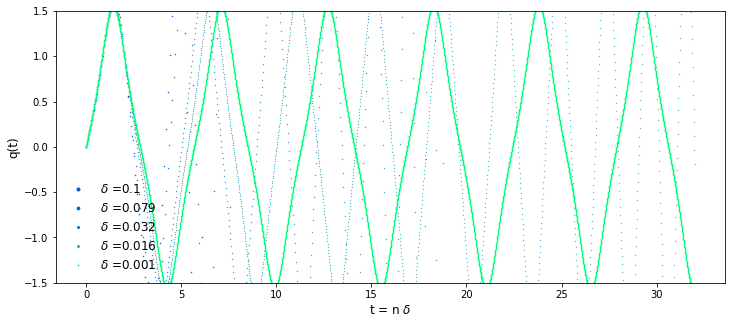

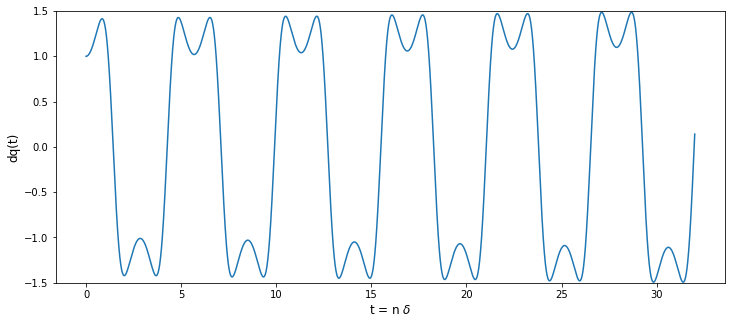

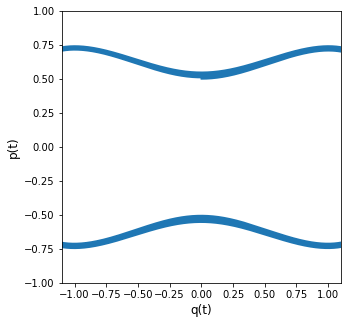

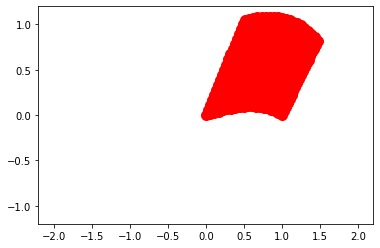

Perímetro: 4.153875173440206
Área: 1.0666431587641048
Vértices: [[0.         0.        ]
 [1.         0.        ]
 [1.47327093 0.81367429]
 [1.42997275 0.85668321]
 [1.38561395 0.89562407]
 [1.34023276 0.93057814]
 [1.29386892 0.96163766]
 [1.24656367 0.98890588]
 [1.1983597  1.01249692]
 [1.14930112 1.03253568]
 [1.09943341 1.04915765]
 [1.04880337 1.06250863]
 [0.99745903 1.07274444]
 [0.94544962 1.08003058]
 [0.89282551 1.08454179]
 [0.83963809 1.08646156]
 [0.78593975 1.08598167]
 [0.73178375 1.08330155]
 [0.67722415 1.07862772]
 [0.62231576 1.07217311]
 [0.56711398 1.06415635]
 [0.51167478 1.05480108]
 [0.48482267 1.00006885]
 [0.45795791 0.94520987]
 [0.43108119 0.89023109]
 [0.40419321 0.83513948]
 [0.37729468 0.77994202]
 [0.35038629 0.7246457 ]
 [0.32346875 0.66925754]
 [0.29654275 0.61378456]
 [0.269609   0.55823378]
 [0.2426682  0.50261225]
 [0.21572105 0.44692702]
 [0.18876827 0.39118513]
 [0.16181054 0.33539367]
 [0.13484859 0.2795597 ]
 [0.1078831  0.22369029]
 [0.0809148

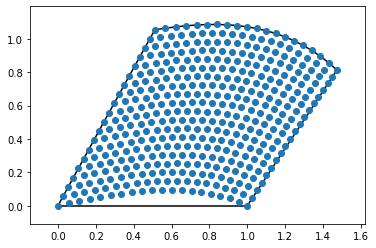

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  8 23:53:36 2020

@author: robert monjo
"""
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
#https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

os.getcwd()

#q = variable de posición, dq0 = \dot{q}(0) = valor inicial de la derivada
#d = granularidad del parámetro temporal
def deriv(q,dq0,d):
   #dq = np.empty([len(q)])
   dq = (q[1:len(q)]-q[0:(len(q)-1)])/d
   dq = np.insert(dq,0,dq0) #dq = np.concatenate(([dq0],dq))
   return dq

#Ecuación de un sistema dinámico continuo
#Ejemplo de oscilador simple
def F(q):
    ddq = -2*q*(q**2-1)
    return ddq

#Resolución de la ecuación dinámica \ddot{q} = F(q), obteniendo la órbita q(t)
#Los valores iniciales son la posición q0 := q(0) y la derivada dq0 := \dot{q}(0)
def orb(n,q0,dq0,F, args=None, d=0.001):
    #q = [0.0]*(n+1)
    q = np.empty([n+1])
    q[0] = q0
    q[1] = q0 + dq0*d
    for i in np.arange(2,n+1):
        args = q[i-2]
        q[i] = - q[i-2] + d**2*F(args) + 2*q[i-1]
    return q #np.array(q),

def periodos(q,d,max=True):
    #Si max = True, tomamos las ondas a partir de los máximos/picos
    #Si max == False, tomamos los las ondas a partir de los mínimos/valles
    epsilon = 5*d
    dq = deriv(q,dq0=None,d=d) #La primera derivada es irrelevante
    if max == True:
        waves = np.where((np.round(dq,int(-np.log10(epsilon))) == 0) & (q >0))
    if max != True:
        waves = np.where((np.round(dq,int(-np.log10(epsilon))) == 0) & (q <0))
    diff_waves = np.diff(waves)
    waves = waves[0][1:][diff_waves[0]>1]
    pers = diff_waves[diff_waves>1]*d
    return pers, waves

#################################################################    
#  CÁLUCLO DE ÓRBITAS
################################################################# 

#Ejemplo gráfico del oscilador simple
q0 = 0.
dq0 = 1.
fig, ax = plt.subplots(figsize=(12,5))
plt.ylim(-1.5, 1.5)  
plt.rcParams["legend.markerscale"] = 6
ax.set_xlabel("t = n $\delta$", fontsize=12)
ax.set_ylabel("q(t)", fontsize=12)
iseq = np.array([1,1.1,1.5,1.8,3])
horiz = 32
for i in iseq:
    d = 10**(-i)
    n = int(horiz/d)
    t = np.arange(n+1)*d
    q = orb(n,q0=q0,dq0=dq0,F=F,d=d)
    plt.plot(t, q, 'ro', markersize=0.5/i,label='$\delta$ ='+str(np.around(d,3)),c=plt.get_cmap("winter")(i/np.max(iseq)))
    ax.legend(loc=3, frameon=False, fontsize=12)
#plt.savefig('Time_granularity.png', dpi=250)

#Ejemplo de coordenadas canónicas (q, p)
#Nos quedamos con el más fino y calculamos la coordenada canónica 'p'
q0 = 0.
dq0 = 1.
horiz = 32
d = 10**(-3)
n = int(horiz/d)
t = np.arange(n+1)*d
q = orb(n,q0=q0,dq0=dq0,F=F,d=d)
dq = deriv(q,dq0=dq0,d=d)
p = dq/2

#Ejemplo gráfico de la derivada de q(t)
fig, ax = plt.subplots(figsize=(12,5))
plt.ylim(-1.5, 1.5)  
plt.rcParams["legend.markerscale"] = 6
ax.set_xlabel("t = n $\delta$", fontsize=12)
ax.set_ylabel("dq(t)", fontsize=12)
plt.plot(t, dq, '-')

#Ejemplo de diagrama de fases (q, p) para una órbita completa
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim(-1.1, 1.1)  
plt.ylim(-1, 1) 
plt.rcParams["legend.markerscale"] = 6
ax.set_xlabel("q(t)", fontsize=12)
ax.set_ylabel("p(t)", fontsize=12)
plt.plot(q, p, '-')
plt.show()


#Ejemplo de diagrama de fases (q, p) para un tiempo determinado
horiz = 0.251
ax = fig.add_subplot(1,1, 1)
seq_q0 = np.linspace(0.,1.,num=20)
seq_dq0 = np.linspace(0.,2,num=20)
q2 = np.array([])
p2 = np.array([])
for i in range(len(seq_q0)):
    for j in range(len(seq_dq0)):
        q0 = seq_q0[i]
        dq0 = seq_dq0[j]
        d = 10**(-3)
        n = int(horiz/d)
        t = np.arange(n+1)*d
        q = orb(n,q0=q0,dq0=dq0,F=F,d=d)
        dq = deriv(q,dq0=dq0,d=d)
        p = dq/2
        q2 = np.append(q2,q[-1])
        p2 = np.append(p2,p[-1])
        plt.xlim(-2.2, 2.2)
        plt.ylim(-1.2, 1.2)
        plt.rcParams["legend.markerscale"] = 6
        ax.set_xlabel("q(t)", fontsize=12)
        ax.set_ylabel("p(t)", fontsize=12)
        plt.plot(q[-1], p[-1], marker="o", markersize= 10, markeredgecolor="red",markerfacecolor="red")
plt.show()

X = np.array([q2,p2]).T
hull = ConvexHull(X)
convex_hull_plot_2d(hull)

print("Perímetro:", hull.area)
print("Área:", hull.volume)        
print("Vértices:", X[hull.vertices])

#IMPORTANTE: ES EL VALOR MÁXIMO??
#IMPORTANTE: Variar d = 10**(-3) más fino para encontrar intervalo de error

In [2]:
#################################################################    
#  ESPACIO FÁSICO
################################################################# 

## Pintamos el espacio de fases
def simplectica(q0,dq0,F,col=0,d = 10**(-4),n = int(16/d),marker='-'): 
    q = orb(n,q0=q0,dq0=dq0,F=F,d=d)
    dq = deriv(q,dq0=dq0,d=d)
    p = dq/2
    plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))

def dibujarEspacioFases(q0Min, q0Max, dq0Min, dq0Max):
    fig = plt.figure(figsize=(8,5))
    fig.subplots_adjust(hspace=0.4, wspace=0.2)
    ax = fig.add_subplot(1,1, 1)
    #Condiciones iniciales:
    seq_q0 = np.linspace(q0Min,q0Max,num=10)
    seq_dq0 = np.linspace(dq0Min,dq0Max,num=10)
    for i in range(len(seq_q0)):
        for j in range(len(seq_dq0)):
            q0 = seq_q0[i]
            dq0 = seq_dq0[j]
            col = (1+i+j*(len(seq_q0)))/(len(seq_q0)*len(seq_dq0))
            #ax = fig.add_subplot(len(seq_q0), len(seq_dq0), 1+i+j*(len(seq_q0)))
            simplectica(q0=q0,dq0=dq0,F=F,col=col,marker='ro',d= 10**(-3),n = int(10/d))
    ax.set_xlabel("q(t)", fontsize=12)
    ax.set_ylabel("p(t)", fontsize=12)
    #fig.savefig('Simplectic.png', dpi=250)
    plt.show()

<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-inp

<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-inp

<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-input-2-c13ac5ac1ccb>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(q, p, marker,c=plt.get_cmap("winter")(col))
<ipython-inp

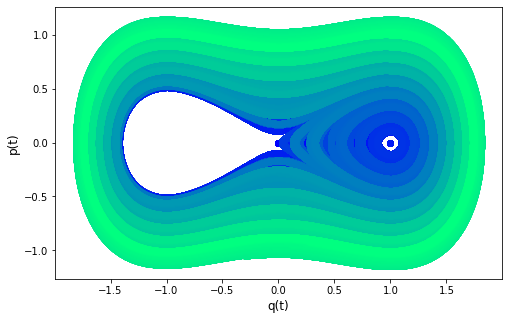

In [3]:
#APARTADO 1
#Representamos gráficamente el espacio fásico con las condiciones iniciales [0,1]x[0,1]
dibujarEspacioFases(0., 1., 0., 2.)

In [4]:
#APARTADO 2
#Cálculo área espacio fásico
def area_espacio_fasico(d):
    areas = []
    for q0 in np.linspace(0., 1., num=10):
        for dq0 in np.linspace(0., 2., num=10):

            n = int(32/d)
            q = orb(n, q0=q0, dq0=dq0, F=F, d=d)
            dq = deriv(q, dq0=dq0, d=d)
            p = dq/2
            T, W = periodos(q, d, max=False)
            if len(W) > 1:

                # Tomamos la mitad de la "curva cerrada" para integrar más fácilmente
                mitad = np.arange(W[0], W[0]+np.int((W[1]-W[0])/2), 1)

                # Regla de Simpson
                area = simps(p[mitad], q[mitad])
                areas.append([q0, dq0, area])
    sort_areas = sorted(areas, key=lambda x: x[2])
    min_a = sort_areas[0][2]
    max_a = 2*sort_areas[len(sort_areas)-1][2]
    return max_a-min_a


def apartado2():
    # Definimos distintos valores de d
    iseq = np.linspace(3.0, 4.0, num=10)
    # Hallamos el área de cada espacio fásico para cada d
    areas = [area_espacio_fasico(10**(-d)) for d in iseq]
    # Hallamos el valor absoluto de las diferencias de cada área comparada con "la mejor"
    resta_areas = [abs(areas[i]-areas[10]) for i in range(len(areas)-1)]
    sort_resta_areas = sorted(resta_areas)
    # Cogemos el cuantil de orden 0,9
    print("El área calculada es:", round(areas[10], 3),
          "con un error de", round(sort_resta_areas[8], 3))

    ################################################################
    ################## TEOREMA DE LIOUVILLE ########################
    ################################################################
    for i in range(4):
        print_espacio_fasico((i+1)*200, i*200)

